<a href="https://colab.research.google.com/github/triciachan/123/blob/main/Week_8_bnb_Query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals
---
- [Airbnb Python Interview Questions](https://nathanrosidi.medium.com/airbnb-python-interview-questions-data-aggregation-and-labeling-43911353aede), how to use Data Aggregation and Labeling in the pandas,  練習資料分類和編碼
- [stratascratch](https://platform.stratascratch.com/coding/9632-host-popularity-rental-prices), retrieve the data by SQL, 如何使用 SQL 取資料. First sign up a new account, and request a Query, 首先登記帳號，使用下列 SQL 進行查詢: 

```select * from airbnb_host_searches;```

However, general Python web scrappy scheme can't retrieve the data easily, 但是沒有辦法簡單地使用 Python 截取資料. Thus, save the query result in local box, and use pandas to scrappy as `csv` data as follows. You can give it a try by yourself, 所以採用將結果存在電腦上，再用 Pandas 讀取，你可以自己嘗試. 

In [1]:
# 1. required packages

import pandas as pd
import numpy as np

In [2]:
#2: Format to two decimals

pd.options.display.float_format = "{:,.2f}".format

In [3]:
#df.to_csv("BNB.csv",index=False)

In [4]:
# Load CSV data, 讀取資料
df = pd.read_csv("https://raw.githubusercontent.com/cchuang2009/2022-1/main/Python_IM/2023-2/BNB.csv")

In [5]:
df.head()

,id,price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_identity_verified,host_response_rate,host_since,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_id
0,8284881,621.46,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3,Real Bed,strict,1,...,f,100%,2016-11-01,Pacific Palisades,1,NaN,90272,4,6,621.46Entire home/apt2016-11-01902721
1,8284882,621.46,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3,Real Bed,strict,1,...,f,100%,2016-11-01,Pacific Palisades,1,NaN,90272,4,6,621.46Entire home/apt2016-11-01902721
2,9479348,598.90,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,2,Real Bed,strict,0,...,f,100%,2017-07-03,Hell's Kitchen,1,60.00,10036,3,4,598.9Entire home/apt2017-07-03100361
3,8596057,420.47,House,Private room,"{""Wireless Internet"",""Air conditioning"",Pool,K...",1,2,Real Bed,flexible,0,...,f,100%,2016-04-20,NaN,0,NaN,91748,1,1,420.47Private room2016-04-20917480
4,11525500,478.75,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Heatin...",2,1,Real Bed,flexible,1,...,f,100%,2017-10-07,Williamsburg,2,100.00,11206,1,1,478.75Entire home/apt2017-10-07112062


In [6]:
df[['price','room_type','host_since','zipcode','number_of_reviews']].nunique()

price                 91
room_type              3
host_since           127
zipcode               91
number_of_reviews     50
dtype: int64

In [7]:
df[['price','room_type','host_since','zipcode','number_of_reviews']]

,price,room_type,host_since,zipcode,number_of_reviews
0,621.46,Entire home/apt,2016-11-01,90272,1
1,621.46,Entire home/apt,2016-11-01,90272,1
2,598.90,Entire home/apt,2017-07-03,10036,1
3,420.47,Private room,2016-04-20,91748,0
4,478.75,Entire home/apt,2017-10-07,11206,2
...,...,...,...,...,...
162,436.94,Private room,2014-06-30,10027,2
163,561.68,Entire home/apt,2014-06-30,10026,28
164,504.34,Private room,2013-12-11,10037,14
165,409.43,Private room,2014-06-30,10026,0


In [8]:
# Drop the duplicates by adding a new column “host_id”
df['host_id'] = df['price'].map(str)+df['room_type'].map(str)+ df['host_since'].map(str)+df['zipcode'].map(str)+df['number_of_reviews'].map(str)

df1 = df[['host_id','number_of_reviews','price']].drop_duplicates()
df1.info()


#Drop the duplicates without creating a new column.
df2 = df[['number_of_reviews', 'price']].drop_duplicates()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 166
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   host_id            160 non-null    object 
 1   number_of_reviews  160 non-null    int64  
 2   price              160 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 166
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number_of_reviews  151 non-null    int64  
 1   price              151 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [9]:
df['host_id']= df['price'].map(str)+df['room_type'].map(str)+df['host_since'].map(str)+df['zipcode'].map(str)+ df['number_of_reviews'].map(str)
df1 = df[['host_id','number_of_reviews','price']].drop_duplicates()

In [10]:
df1

,host_id,number_of_reviews,price
0,621.46Entire home/apt2016-11-01902721,1,621.46
2,598.9Entire home/apt2017-07-03100361,1,598.90
3,420.47Private room2016-04-20917480,0,420.47
4,478.75Entire home/apt2017-10-07112062,2,478.75
5,662.01Entire home/apt2016-01-20941230,0,662.01
...,...,...,...
162,436.94Private room2014-06-30100272,2,436.94
163,561.68Entire home/apt2014-06-301002628,28,561.68
164,504.34Private room2013-12-111003714,14,504.34
165,409.43Private room2014-06-30100260,0,409.43


In [11]:
# Visualization

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

%matplotlib inline

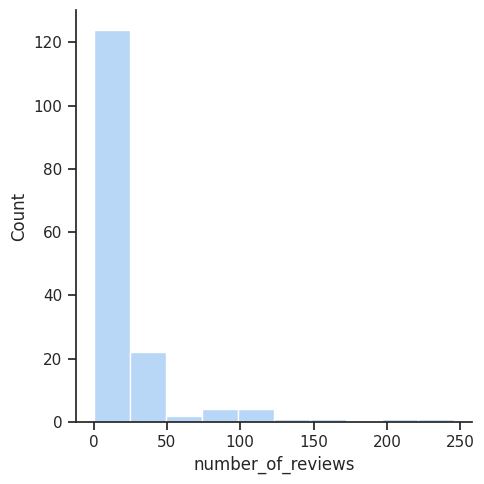

In [12]:
# distplot of all
sns.displot(df1,x='number_of_reviews', bins=10);
# distplot of majority
#sns.displot(df1[df1['number_of_reviews']<50],x='number_of_reviews', bins=10);

In [13]:
# Conditional statements with the lambda function

df1['host_popularity'] = df1['number_of_reviews'].apply(lambda x:'New' if x<1 else 'Rising' if x<=5 else 'Trending Up' if x<=15 else 'Popular' if x<=40 else 'Hot')


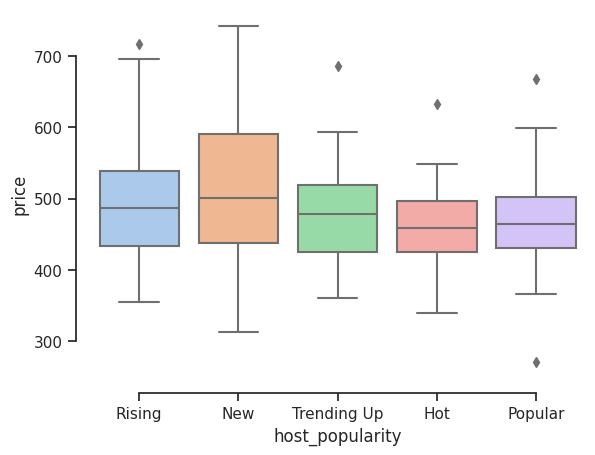

In [14]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=df1,x="host_popularity", y="price")
sns.despine(offset=10, trim=True)

In [15]:

result= df1.groupby('host_popularity').agg(min_price=('price',min),avg_price=('price',np.mean),max_price = ('price',max)).reset_index()

In [16]:
result

,host_popularity,min_price,avg_price,max_price
0,Hot,340.12,464.23,633.51
1,New,313.55,515.92,741.76
2,Popular,270.81,472.81,667.83
3,Rising,355.53,503.85,717.01
4,Trending Up,361.09,476.28,685.65
